# BIOS 534 Final homework

### Jiawei Meng (2408817)

#### read the file directly from the website

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn as sk
wines=pd.read_csv("https://raw.githubusercontent.com/steviep42/bios534_spring_2020/master/data/exp_wines_na.csv")

In [8]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed.acidity         6497 non-null   float64
 1   volatile.acidity      5848 non-null   float64
 2   citric.acid           6497 non-null   float64
 3   residual.sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free.sulfur.dioxide   6497 non-null   float64
 6   total.sulfur.dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### 1) Separate the predictor features from the target feature and encode the target feature to a 0 and 1

In [9]:
y = np.where(wines['color']=='red',1,0)
x = wines.iloc[:,0:12]

#### 2) Check For missing values – print out (using code) how many and in what column.

In [12]:
print(wines.isnull().sum())

fixed.acidity             0
volatile.acidity        649
citric.acid               0
residual.sugar            0
chlorides                 0
free.sulfur.dioxide       0
total.sulfur.dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
color                     0
dtype: int64


####  3) Apply KNN imputation to fill in the null values in the predictor variables

In [13]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
x = imputer.fit_transform(x)

#### 4) Create a boxplot of all the numeric predictors (See Figure 1 below)

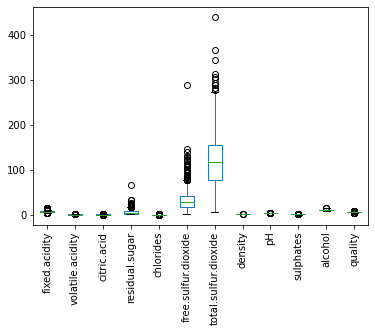

In [16]:
df=pd.DataFrame(x,columns=wines.iloc[:,0:12].columns)
df.boxplot(grid=False, rot=90)
plt.xticks(rotation=90)
plt.show()

#### 5) Create a Training / Test pair with an 80/20 proportion with a random_state=0

In [17]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#### 6) Fit the Training Data Using a KNN classifier using K-Fold(K-10) CV and report the mean AUC of the 10 folds. In your call to KFolds use a random_state=7 and shuffle=True

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

mean_auc = 0
# Use the KFold function to provide train/test indices to split data in train and test sets
kf = KFold(n_splits=10, random_state = 7, shuffle = True)

for train_index, test_index in kf.split(x_train,y_train):
    X_train, X_test = x_train[train_index], x_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]
    
    # train model and make predictions
    model = KNeighborsClassifier()
    model.fit(X_train, Y_train)
    preds = model.predict_proba(X_test)[:, 1]
    
    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    mean_auc += roc_auc

print('the mean AUC of the 10 folds is' , mean_auc/10)

the mean AUC of the 10 folds is 0.7772860791171753


#### 7) Go back and scale the imputed version of the predictor variables. Using the StandardScaler is fine.

In [20]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

#### 8) Create a Training / Test pair of the scaled data with an 80/20 proportion with a random_state=0

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

#### 9) Fit the Training Data Using a KNN classifier using K-Fold(K-10) CV and report the mean AUC of the 10 folds. In your call to KFolds use a random_state=7 and shuffle=True. Is there an improvement in the AUC ?

In [22]:
mean_auc = 0.0

# Use the KFold function to provide train/test indices to split data in train and test sets
kf = KFold(n_splits=10, random_state = 7, shuffle = True)

for train_index, test_index in kf.split(x_train,y_train):
    X_train, X_test = x_train[train_index], x_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]

    # train model and make predictions
    model = KNeighborsClassifier()
    model.fit(X_train, Y_train)
    preds = model.predict_proba(X_test)[:, 1]
    
    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    mean_auc += roc_auc

print('the mean AUC of the 10 folds is' , mean_auc/10)

the mean AUC of the 10 folds is 0.8019720563934115


#### There is an improvement in the AUC.

#### 10) Using the scaled data, apply a PCA transformation that retains two components and repeat step 9. Is there a difference in the mean AUC ?

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x = pca.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=0)

mean_auc = 0.0

# Use the KFold function to provide train/test indices to split data in train and test sets
kf = KFold(n_splits=10, random_state = 7, shuffle = True)

for train_index, test_index in kf.split(x_train,y_train):
    X_train, X_test = x_train[train_index], x_train[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]

    # train model and make predictions
    neighbor = KNeighborsClassifier()
    neighbor.fit(X_train, Y_train)
    preds = neighbor.predict_proba(X_test)[:, 1]

    # compute AUC metric for this CV fold
    fpr, tpr, thresholds = roc_curve(Y_test, preds)
    roc_auc = auc(fpr, tpr)
    mean_auc += roc_auc

print('the mean AUC of the 10 folds is' , mean_auc/10)

the mean AUC of the 10 folds is 0.8039979281709355


#### There is a little difference in the mean AUC.